## Sensitivity analysis

In [1]:
# Imports
from gfeatpy.observation import Range
from gfeatpy import planet
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Default values
Nr = 295
Nd = 19
I = np.deg2rad(88)
rho = 400e3
l_max = 100

In [3]:
# Define error spectra
mwi = lambda f: 2.62 * np.sqrt(1 + (0.003/f)**2) * 1e-6
acc = lambda f: 1e-10 * np.sqrt(1 + (f/0.5)**4 + (0.005/f))

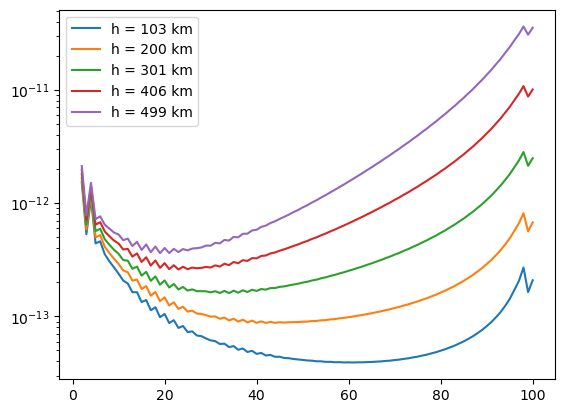

In [4]:
# Semi-major axis sensitivity
labels = []

fig, ax = plt.subplots()

l = np.arange(0, l_max+1, 1)

for Nri in [316, 309, 302, 295, 289]:
    range = Range(l_max, Nri, Nd, I, rho)
    range.set_observation_error(mwi, acc)
    range.solve()
    labels.append(f"h = {int((range.get_radius()  - planet.ae)/1000)} km")
    ax.semilogy(l[2:], range.rms_per_coefficient_per_degree()[2:])

ax.legend(labels)
plt.show()

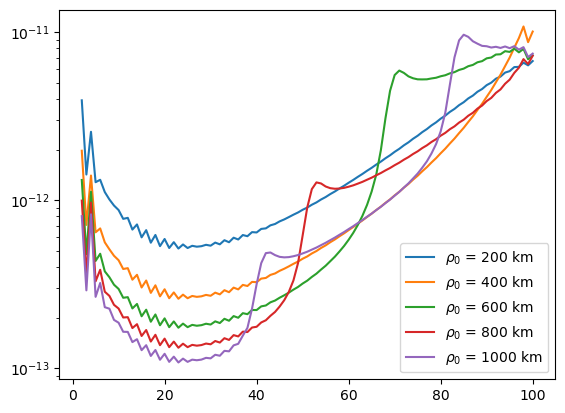

In [5]:
# Nominal inter-satellite separation sensitivity
labels = []

fig, ax = plt.subplots()

l = np.arange(0, l_max+1, 1)

for rho_i in np.arange(200e3, 1200e3, 200e3):
    range = Range(l_max, Nr, Nd, I, rho_i)
    range.set_observation_error(mwi, acc)
    range.solve()
    labels.append(f"$\\rho_0$ = {int(rho_i/1e3)} km")
    ax.semilogy(l[2:], range.rms_per_coefficient_per_degree()[2:])

ax.legend(labels)
plt.show()

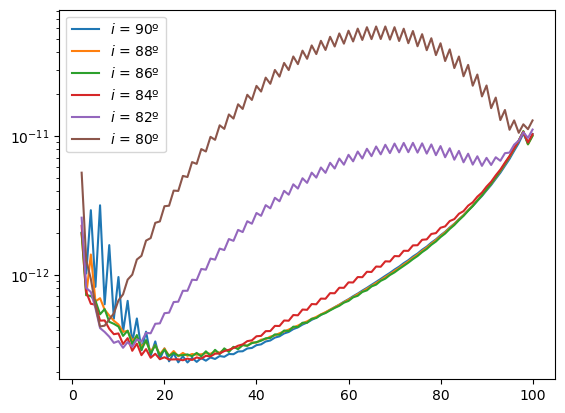

In [6]:
# Inclination sensitivity
labels = []

fig, ax = plt.subplots()

l = np.arange(0, l_max+1, 1)

for I_i in np.deg2rad(np.arange(80, 92, 2)[::-1]):
    range = Range(l_max, Nr, Nd, I_i, rho)
    range.set_observation_error(mwi, acc)
    range.solve()
    labels.append(f"$i$ = {int(np.rad2deg(I_i))}º")
    ax.semilogy(l[2:], range.rms_per_coefficient_per_degree()[2:])

ax.legend(labels)
plt.show()